In [ ]:
import pandas as pd

In [ ]:
col=["Cement-to-cm","cement type(Mpa)","Fly ash-to-cm","Slag-to-cm","Silica fume-to-cm","Metakaolin-to-cm","Nano silica-to-cm","Limestone-to-cm"
,"Quartz powder-to-cm"
,"Sand-to-cm"
,"Maximum aggregate size(mm)"
,"Water-to-cm"
,"Superplasticizer-to-cm"
,"Steel fiber volume %"
,"Aspect ratio of fiber","16","Expected"
]

In [ ]:
df_train=pd.read_csv('/content/Train_Data_Final.csv')
df_test=pd.read_csv('/content/Test_Data.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8000 non-null   object 
 1   Time           8000 non-null   object 
 2   CO(GT)         8000 non-null   float64
 3   PT08.S1(CO)    8000 non-null   float64
 4   NMHC(GT)       8000 non-null   int64  
 5   C6H6(GT)       8000 non-null   float64
 6   PT08.S2(NMHC)  8000 non-null   float64
 7   NOx(GT)        8000 non-null   float64
 8   PT08.S3(NOx)   8000 non-null   float64
 9   NO2(GT)        8000 non-null   float64
 10  PT08.S4(NO2)   8000 non-null   float64
 11  PT08.S5(O3)    8000 non-null   float64
 12  T              8000 non-null   float64
 13  AH             8000 non-null   float64
 14  RH_type        8000 non-null   object 
 15  id             8000 non-null   int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 1000.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1357 non-null   int64  
 1   Date           1357 non-null   object 
 2   Time           1357 non-null   object 
 3   CO(GT)         1357 non-null   float64
 4   PT08.S1(CO)    1357 non-null   float64
 5   NMHC(GT)       1357 non-null   int64  
 6   C6H6(GT)       1357 non-null   float64
 7   PT08.S2(NMHC)  1357 non-null   float64
 8   NOx(GT)        1357 non-null   float64
 9   PT08.S3(NOx)   1357 non-null   float64
 10  NO2(GT)        1357 non-null   float64
 11  PT08.S4(NO2)   1357 non-null   float64
 12  PT08.S5(O3)    1357 non-null   float64
 13  T              1357 non-null   float64
 14  AH             1357 non-null   float64
 15  id             1357 non-null   int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 169.8+ KB


In [ ]:
df_train.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type,id
0,2004-03-10,18:00:00,2.60,1360.00,150,11.88,1045.50,166.00,1056.25,113.00,1692.00,1267.50,13.60,0.76,Ideal,1
1,2004-03-10,19:00:00,2.00,1292.25,112,9.40,954.75,103.00,1173.75,92.00,1558.75,972.25,13.30,0.73,Ideal,2
2,2004-03-10,20:00:00,2.20,1402.00,88,9.00,939.25,131.00,1140.00,114.00,1554.50,1074.00,11.90,0.75,Slightly Elevated,3
3,2004-03-10,21:00:00,2.20,1375.50,80,9.23,948.25,172.00,1092.00,122.00,1583.75,1203.25,11.00,0.79,Slightly Elevated,4
4,2004-03-10,22:00:00,1.60,1272.25,51,6.52,835.50,131.00,1205.00,116.00,1490.00,1110.00,11.15,0.79,Slightly Elevated,5


In [ ]:
df_train.nunique()

Date              335
Time               24
CO(GT)             96
PT08.S1(CO)      3100
NMHC(GT)          430
C6H6(GT)         3557
PT08.S2(NMHC)    3557
NOx(GT)          1546
PT08.S3(NOx)     3356
NO2(GT)           859
PT08.S4(NO2)     3988
PT08.S5(O3)      4315
T                3142
AH               7708
RH_type             5
id               8000
dtype: int64

In [ ]:
df_train.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'AH', 'RH_type', 'id'],
      dtype='object')

In [ ]:
import plotly.express as px
import seaborn as sns

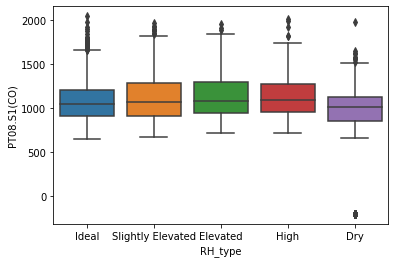

In [ ]:
# create grouped boxplot 
sns.boxplot(y = df_train['PT08.S1(CO)'],
            x = df_train['RH_type']);

In [ ]:
corr=df_train.corr()

In [ ]:
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
CO(GT),1.00,0.05,0.15,-0.02,0.05,0.53,-0.07,0.68,-0.03,0.09,-0.06,-0.04,0.04
PT08.S1(CO),0.05,1.00,0.19,0.84,0.94,0.28,0.05,0.17,0.86,0.89,0.73,0.75,-0.07
NMHC(GT),0.15,0.19,1.00,0.03,0.10,0.02,0.04,0.14,0.14,0.11,-0.01,0.01,-0.46
C6H6(GT),-0.02,0.84,0.03,1.00,0.76,0.01,0.49,0.01,0.79,0.64,0.97,0.98,-0.07
PT08.S2(NMHC),0.05,0.94,0.10,0.76,1.00,0.35,-0.12,0.21,0.88,0.91,0.65,0.63,-0.05
NOx(GT),0.53,0.28,0.02,0.01,0.35,1.00,-0.41,0.81,0.06,0.46,-0.13,-0.09,0.36
PT08.S3(NOx),-0.07,0.05,0.04,0.49,-0.12,-0.41,1.00,-0.22,0.08,-0.24,0.57,0.61,-0.23
NO2(GT),0.68,0.17,0.14,0.01,0.21,0.81,-0.22,1.00,0.04,0.26,-0.06,-0.05,0.11
PT08.S4(NO2),-0.03,0.86,0.14,0.79,0.88,0.06,0.08,0.04,1.00,0.73,0.76,0.70,-0.36
PT08.S5(O3),0.09,0.89,0.11,0.64,0.91,0.46,-0.24,0.26,0.73,1.00,0.49,0.51,0.09


In [ ]:
df_train['Time'] = (df_train['Time']).astype(object)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8000 non-null   object 
 1   Time           8000 non-null   object 
 2   CO(GT)         8000 non-null   float64
 3   PT08.S1(CO)    8000 non-null   float64
 4   NMHC(GT)       8000 non-null   int64  
 5   C6H6(GT)       8000 non-null   float64
 6   PT08.S2(NMHC)  8000 non-null   float64
 7   NOx(GT)        8000 non-null   float64
 8   PT08.S3(NOx)   8000 non-null   float64
 9   NO2(GT)        8000 non-null   float64
 10  PT08.S4(NO2)   8000 non-null   float64
 11  PT08.S5(O3)    8000 non-null   float64
 12  T              8000 non-null   float64
 13  AH             8000 non-null   float64
 14  RH_type        8000 non-null   object 
 15  id             8000 non-null   int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 1000.1+ KB


In [ ]:
fig = px.bar(corr[:-1],x=corr.columns)
fig.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
def select_f(X,y):
  selected_f=[]
  # perform feature selection
  rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=30)
  fit = rfe.fit(X, y)
  # report selected features
  print('Selected Features:')
  names = X.columns.values
  for i in range(len(fit.support_)):
    if fit.support_[i]:
      print(names[i])
      selected_f.append(names[i])
  return selected_f,fit

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# plot feature rank
def plot_f(X,fit,f):
  names = X.columns.values
  ticks = [i for i in range(len(names))]
  plt.figure(figsize=(25, 10))
  plt.bar(ticks, fit.ranking_)
  plt.xticks(ticks, names)
  plt.title(f)
  plt.show()

In [ ]:
from statsmodels.discrete.discrete_model import get_dummies
X=df_train.drop(columns=['RH_type','id','Date'])
y=pd.get_dummies(df_train['RH_type'])

In [ ]:
X=pd.get_dummies(X)
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,Time_14:00:00,Time_15:00:00,Time_16:00:00,Time_17:00:00,Time_18:00:00,Time_19:00:00,Time_20:00:00,Time_21:00:00,Time_22:00:00,Time_23:00:00
0,2.60,1360.00,150,11.88,1045.50,166.00,1056.25,113.00,1692.00,1267.50,...,0,0,0,0,1,0,0,0,0,0
1,2.00,1292.25,112,9.40,954.75,103.00,1173.75,92.00,1558.75,972.25,...,0,0,0,0,0,1,0,0,0,0
2,2.20,1402.00,88,9.00,939.25,131.00,1140.00,114.00,1554.50,1074.00,...,0,0,0,0,0,0,1,0,0,0
3,2.20,1375.50,80,9.23,948.25,172.00,1092.00,122.00,1583.75,1203.25,...,0,0,0,0,0,0,0,1,0,0
4,1.60,1272.25,51,6.52,835.50,131.00,1205.00,116.00,1490.00,1110.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.40,937.50,-200,3.67,692.00,192.90,937.00,149.00,804.75,737.00,...,0,0,0,0,0,0,0,1,0,0
7996,1.10,896.25,-200,2.61,627.00,157.80,1033.25,126.30,781.50,610.00,...,0,0,0,0,0,0,0,0,1,0
7997,1.00,907.25,-200,2.42,613.75,149.80,1052.00,119.80,781.75,627.00,...,0,0,0,0,0,0,0,0,0,1
7998,1.10,902.25,-200,2.40,612.50,130.30,1049.25,109.50,776.75,565.75,...,0,0,0,0,0,0,0,0,0,0


Selected Features:
CO(GT)
PT08.S1(CO)
PT08.S3(NOx)
NO2(GT)
PT08.S4(NO2)
PT08.S5(O3)
T
AH


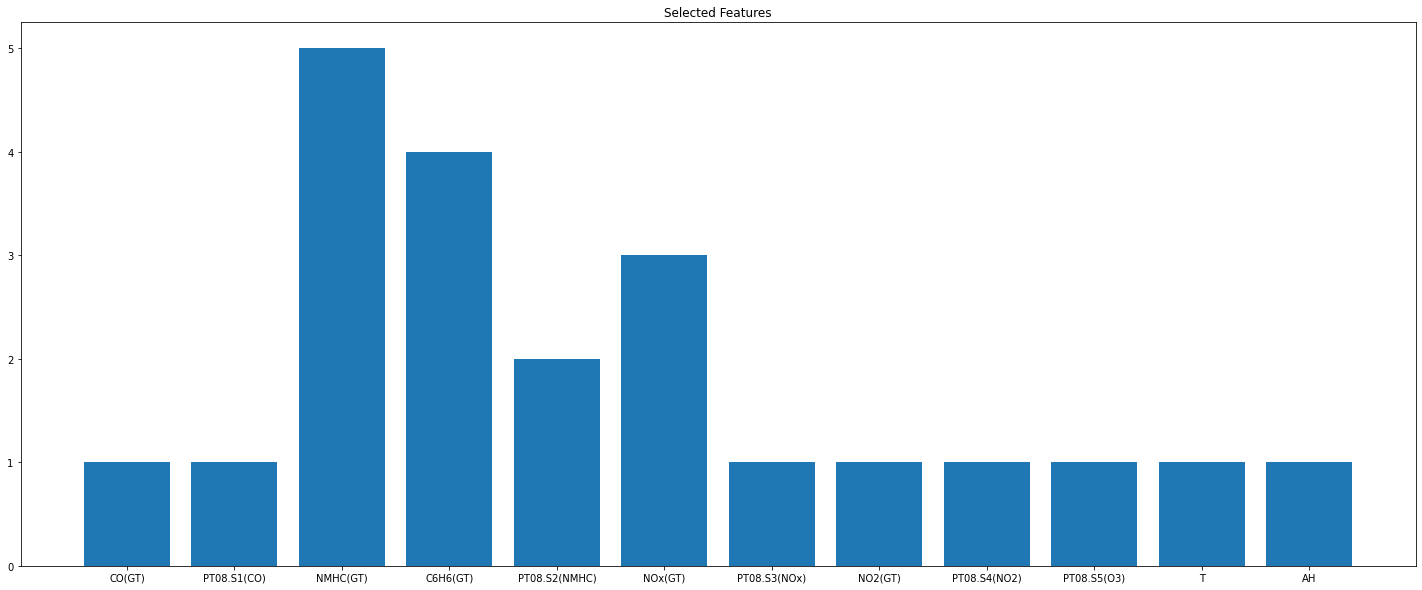

In [ ]:
selected_f,fit=select_f(X,y)
plot_f(X,fit,'Selected Features')

In [ ]:
selected_f

['CO(GT)',
 'PT08.S1(CO)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'AH']

In [ ]:
X=df_train[selected_f]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


  5%|▍         | 2/42 [00:01<00:26,  1.49it/s]

BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 19%|█▉        | 8/42 [00:01<00:05,  5.97it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 24%|██▍       | 10/42 [00:08<00:41,  1.30s/it]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 36%|███▌      | 15/42 [00:37<01:25,  3.17s/it]

GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 48%|████▊     | 20/42 [00:43<00:44,  2.04s/it]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 60%|█████▉    | 25/42 [00:44<00:17,  1.02s/it]

LinearSVR model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 71%|███████▏  | 30/42 [01:00<00:21,  1.78s/it]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


 79%|███████▊  | 33/42 [01:00<00:11,  1.26s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 93%|█████████▎| 39/42 [01:07<00:02,  1.03it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


100%|██████████| 42/42 [01:22<00:00,  1.96s/it]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (7200, 5) instead.


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.93,0.94,0.10,2.03
RandomForestRegressor,0.93,0.93,0.11,4.34
BaggingRegressor,0.92,0.92,0.11,0.53
DecisionTreeRegressor,0.87,0.87,0.14,0.13
XGBRegressor,0.87,0.87,0.14,5.47
ExtraTreeRegressor,0.78,0.78,0.18,0.04
MLPRegressor,0.35,0.36,0.31,4.64
KNeighborsRegressor,0.30,0.31,0.32,0.07
Ridge,0.17,0.18,0.36,0.02


In [ ]:
px.bar(models[:10]['RMSE'],y='RMSE')

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [ ]:
params = {
    'max_depth': 5,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}

In [ ]:
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)

XGBoostError: ignored

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from  sklearn.metrics import mean_squared_error

In [ ]:
reg = ExtraTreesRegressor(n_estimators=10, random_state=0).fit(
   X_train, y_train)
reg.score(X_train, y_train)

1.0

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([[1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       ...,
       [0. , 0.1, 0. , 0. , 0.9],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ]])

In [ ]:
mean_squared_error(y_test,y_pred)**0.5

0.1250599856069078

In [ ]:
col_t=["Cement-to-cm","cement type(Mpa)","Fly ash-to-cm","Slag-to-cm","Silica fume-to-cm","Metakaolin-to-cm","Nano silica-to-cm","Limestone-to-cm"
,"Quartz powder-to-cm"
,"Sand-to-cm"
,"Maximum aggregate size(mm)"
,"Water-to-cm"
,"Superplasticizer-to-cm"
,"Steel fiber volume %"
,"Aspect ratio of fiber","16"
]

In [ ]:
df_t=pd.read_csv('/content/Test_Data - Sheet1.csv')
df_t.columns=col_t

In [ ]:
X=df_t[selected_f]

In [ ]:
y_pred_test=reg.predict(X)

In [ ]:
df=pd.DataFrame()

In [ ]:
df['Id']=df_t.index+1

In [ ]:
df['Expected']=y_pred_test

In [ ]:
df

,Id,Expected
0,1,142.00
1,2,136.55
2,3,132.20
3,4,132.99
4,5,143.97
5,6,132.83
6,7,147.61
7,8,125.00
8,9,130.57
9,10,125.07


In [ ]:
df.to_csv('/content/Test_predictions.csv')